In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [4]:
df=pd.read_csv("../data/preprocessed_data.csv",index_col=False)

Pregunta 1

In [7]:
pregunta1=pd.concat([df["publish_time"],df["category_name"]],axis=1)
pregunta1["publish_time"]=(pd.to_datetime(df['publish_time'])).dt.month
pregunta1=pregunta1.groupby(['publish_time', 'category_name']).size().reset_index(name='frecuencia') \
    .sort_values('frecuencia', ascending=False) \
    .drop_duplicates('publish_time')

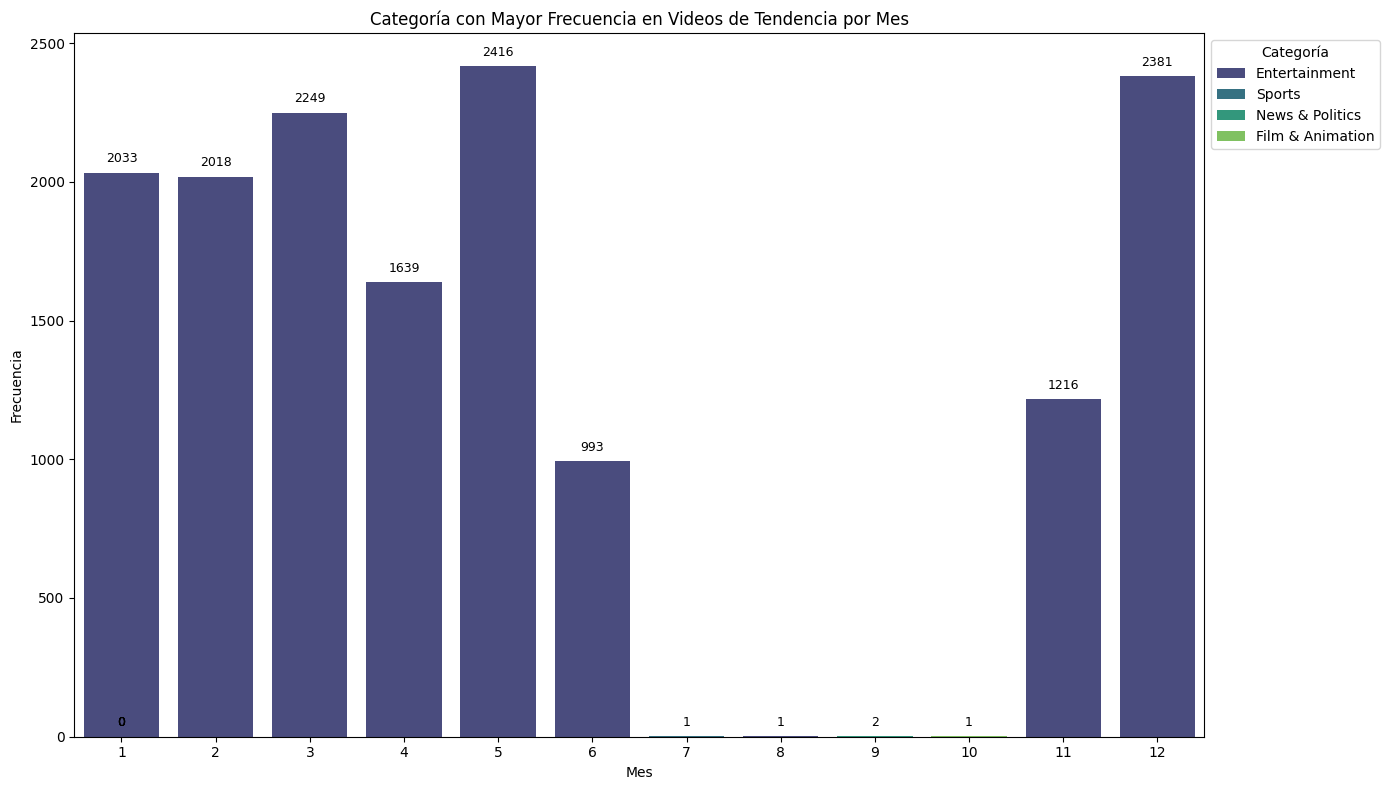

In [9]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='publish_time', y='frecuencia', hue='category_name', data=pregunta1, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.title('Categoría con Mayor Frecuencia en Videos de Tendencia por Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

Pregunta 2

In [10]:
pregunta2=df.groupby('category_name')['likes'].sum().reset_index()
pregunta2 = pregunta2.sort_values(by='likes', ascending=False)

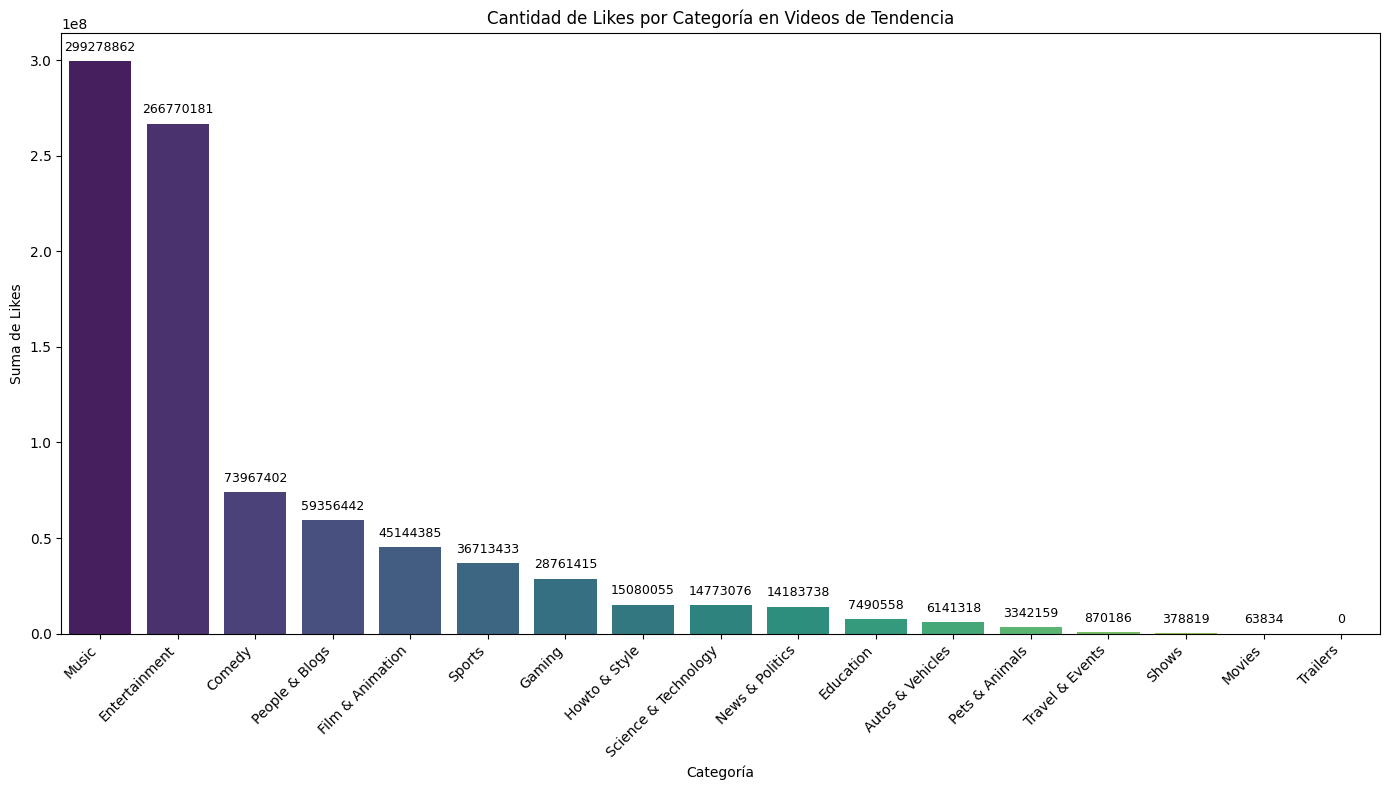

In [11]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='category_name', y='likes', hue='category_name', data=pregunta2, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.title('Cantidad de Likes por Categoría en Videos de Tendencia')
plt.xlabel('Categoría')
plt.ylabel('Suma de Likes')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Pregunta 3

In [12]:
pregunta3=df.groupby('category_name')[['likes', 'dislikes']].sum().reset_index()
pregunta3['ratio_likes_dislikes'] = pregunta3['likes'] / pregunta3['dislikes']
pregunta3 = pregunta3.sort_values(by='ratio_likes_dislikes', ascending=False)

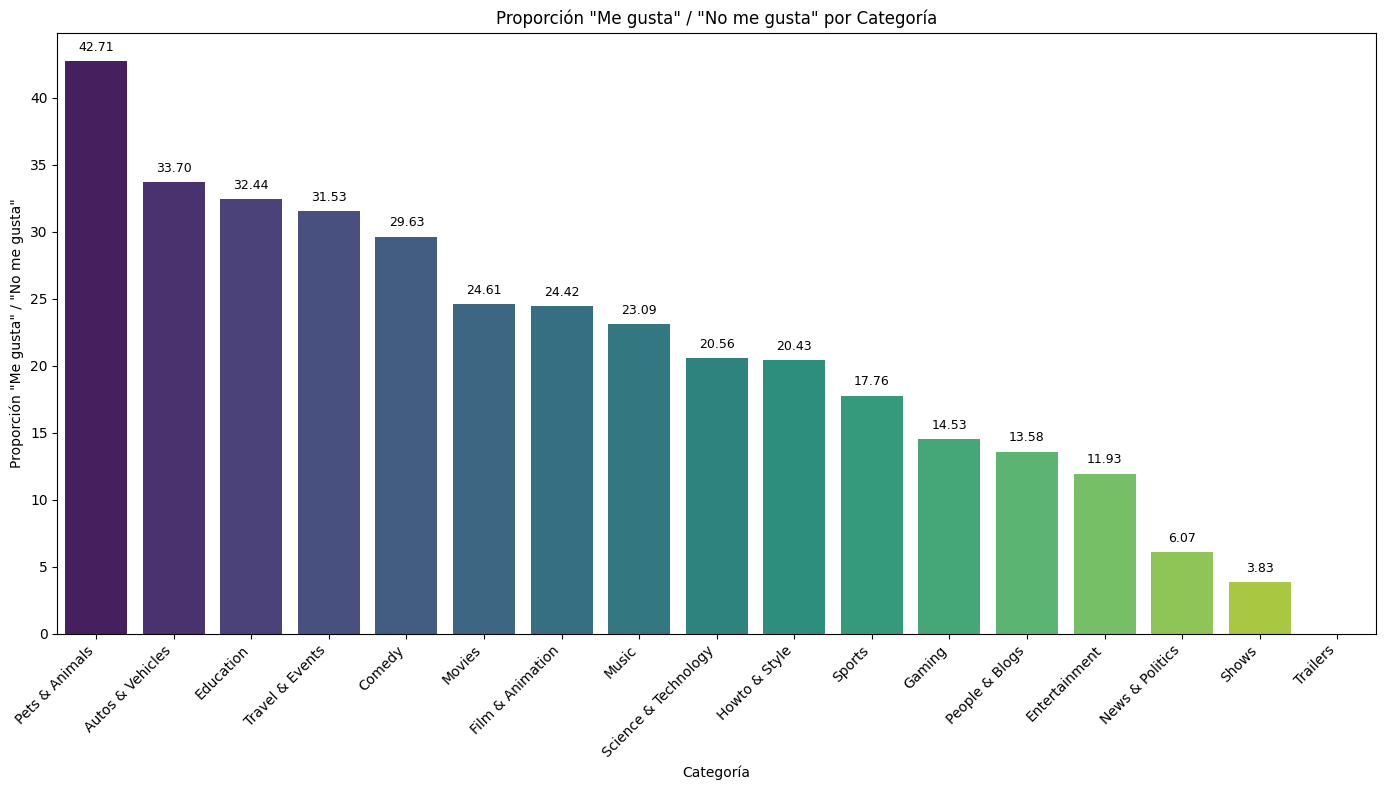

In [13]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='category_name', y='ratio_likes_dislikes', hue='category_name', data=pregunta3, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.title('Proporción "Me gusta" / "No me gusta" por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Proporción "Me gusta" / "No me gusta"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pregunta 4

In [14]:
pregunta4=df.groupby('category_name')[['views', 'comment_count']].sum().reset_index()
pregunta4['ratio_views_comments'] = pregunta4['views'] / pregunta4['comment_count']
pregunta4 = pregunta4.sort_values(by='ratio_views_comments', ascending=False)
pregunta4=pregunta4.drop(15)

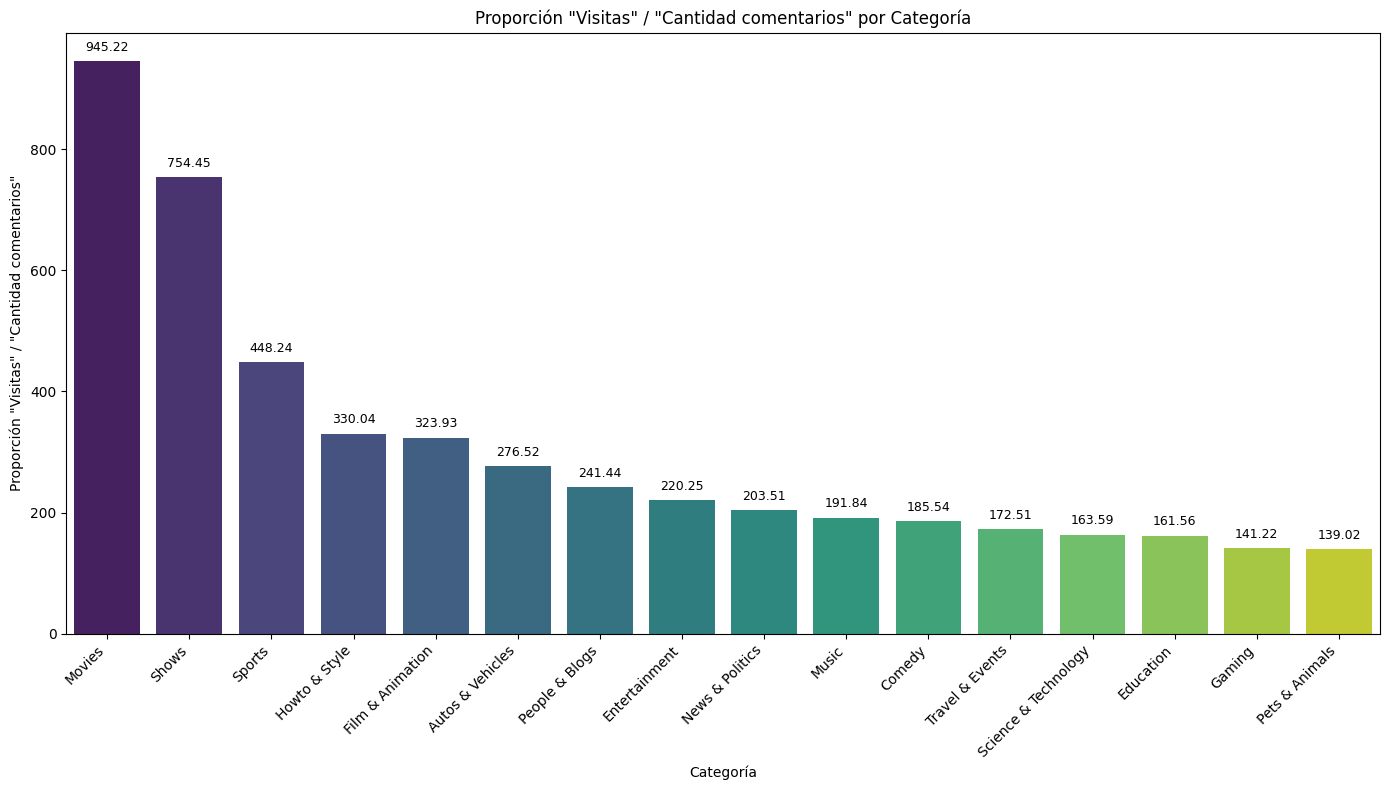

In [15]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='category_name', y='ratio_views_comments', hue='category_name', data=pregunta4, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.title('Proporción "Visitas" / "Cantidad comentarios" por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Proporción "Visitas" / "Cantidad comentarios"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pregunta 5

In [16]:
pregunta5 = df.groupby(['category_name', 'title_polarity', 'publish_season']).size().reset_index(name='count')
pregunta5 = pregunta5[pregunta5['title_polarity'].isin(['Positivo', 'Negativo'])]
df_pos = pregunta5[pregunta5['title_polarity'] == 'Positivo']
max_pos_categories = df_pos.loc[df_pos.groupby('publish_season')['count'].idxmax()]
df_neg = pregunta5[pregunta5['title_polarity'] == 'Negativo']
max_neg_categories = df_neg.loc[df_neg.groupby('publish_season')['count'].idxmax()]

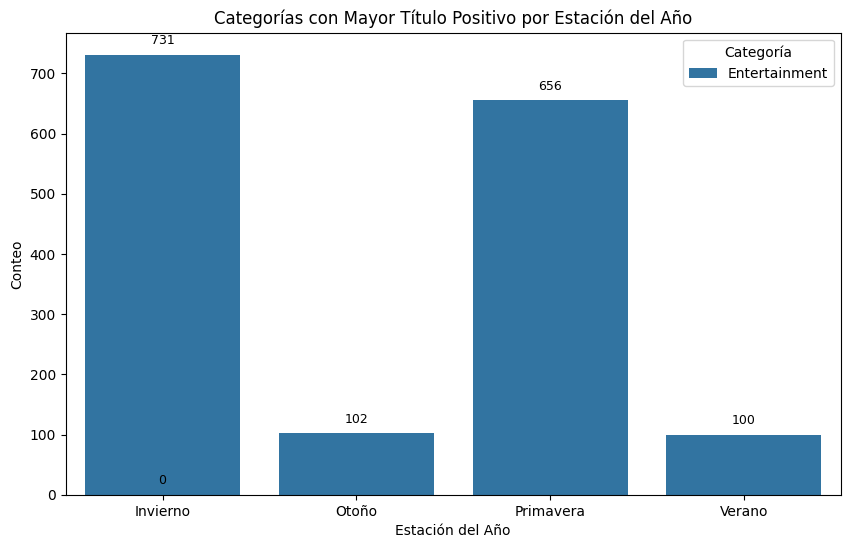

In [17]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='publish_season', y='count', hue='category_name', data=max_pos_categories)
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.legend(title='Categoría', loc='upper right')
plt.xlabel('Estación del Año')
plt.ylabel('Conteo')
plt.title('Categorías con Mayor Título Positivo por Estación del Año')
plt.show()

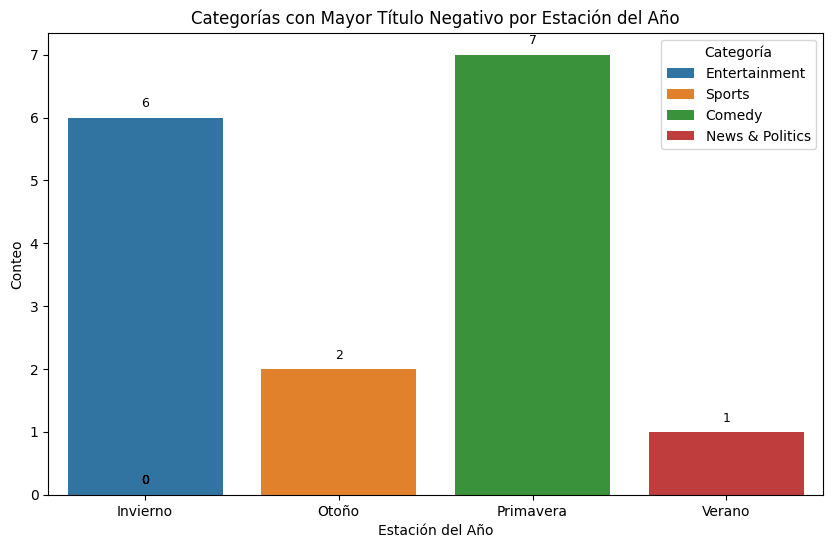

In [18]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='publish_season', y='count', hue='category_name', data=max_neg_categories)
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.legend(title='Categoría', loc='upper right')
plt.xlabel('Estación del Año')
plt.ylabel('Conteo')
plt.title('Categorías con Mayor Título Negativo por Estación del Año')
plt.show()

Pregunta 6

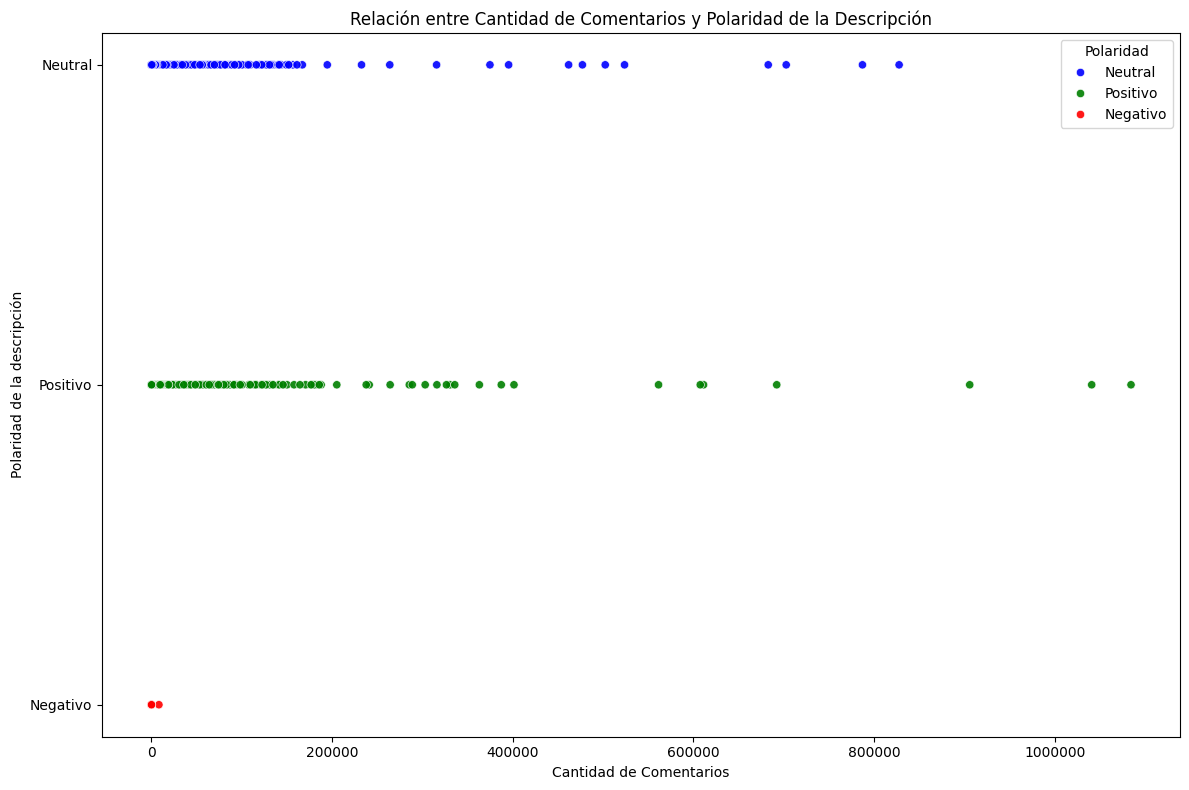

In [19]:
custom_palette = {'Positivo': 'green', 'Negativo': 'red', 'Neutral': 'blue'}
plt.figure(figsize=(12, 8))
sns.scatterplot(x='comment_count', y='description_polarity', data=df, hue='description_polarity', palette=custom_palette, alpha=0.9)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Relación entre Cantidad de Comentarios y Polaridad de la Descripción')
plt.xlabel('Cantidad de Comentarios')
plt.ylabel('Polaridad de la descripción')
plt.legend(title='Polaridad', loc='upper right')
plt.tight_layout()
plt.show()

Pregunta 7

In [23]:
df['publish_time']=pd.to_datetime(df['publish_time'])
videos_por_mes = (df['publish_time'].dt.month).value_counts().sort_index()
videos_por_mes.index = ["Enero","Febrero","Marzo","Abril","Mayo","junio","Julio","Agosto","Setiembre","Octubre","Noviembre","Diciembre"]

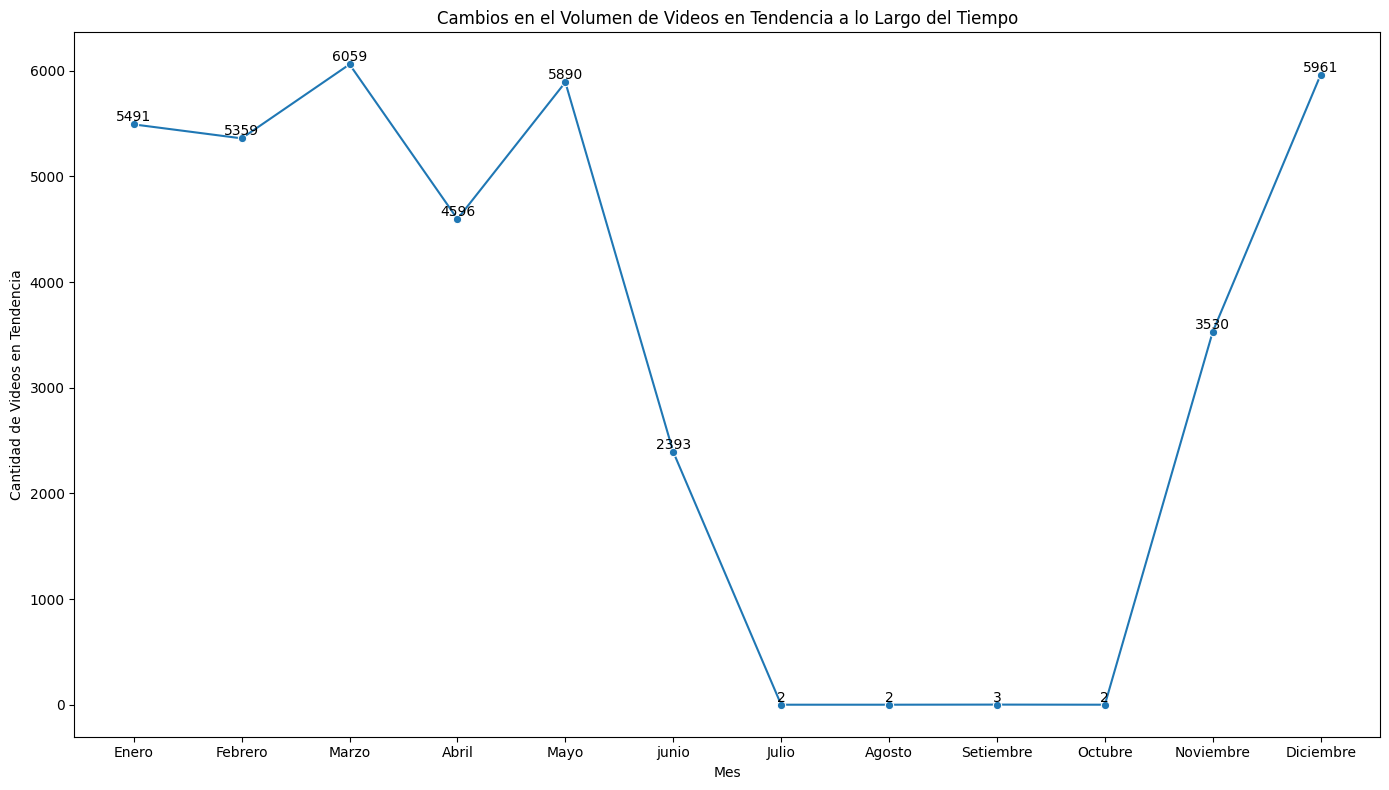

In [24]:
plt.figure(figsize=(14, 8))
sns.lineplot(x=videos_por_mes.index.astype(str), y=videos_por_mes.values, marker='o')
for i, value in enumerate(videos_por_mes.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.title('Cambios en el Volumen de Videos en Tendencia a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Videos en Tendencia')
plt.tight_layout()
plt.show()

Pregunta 8

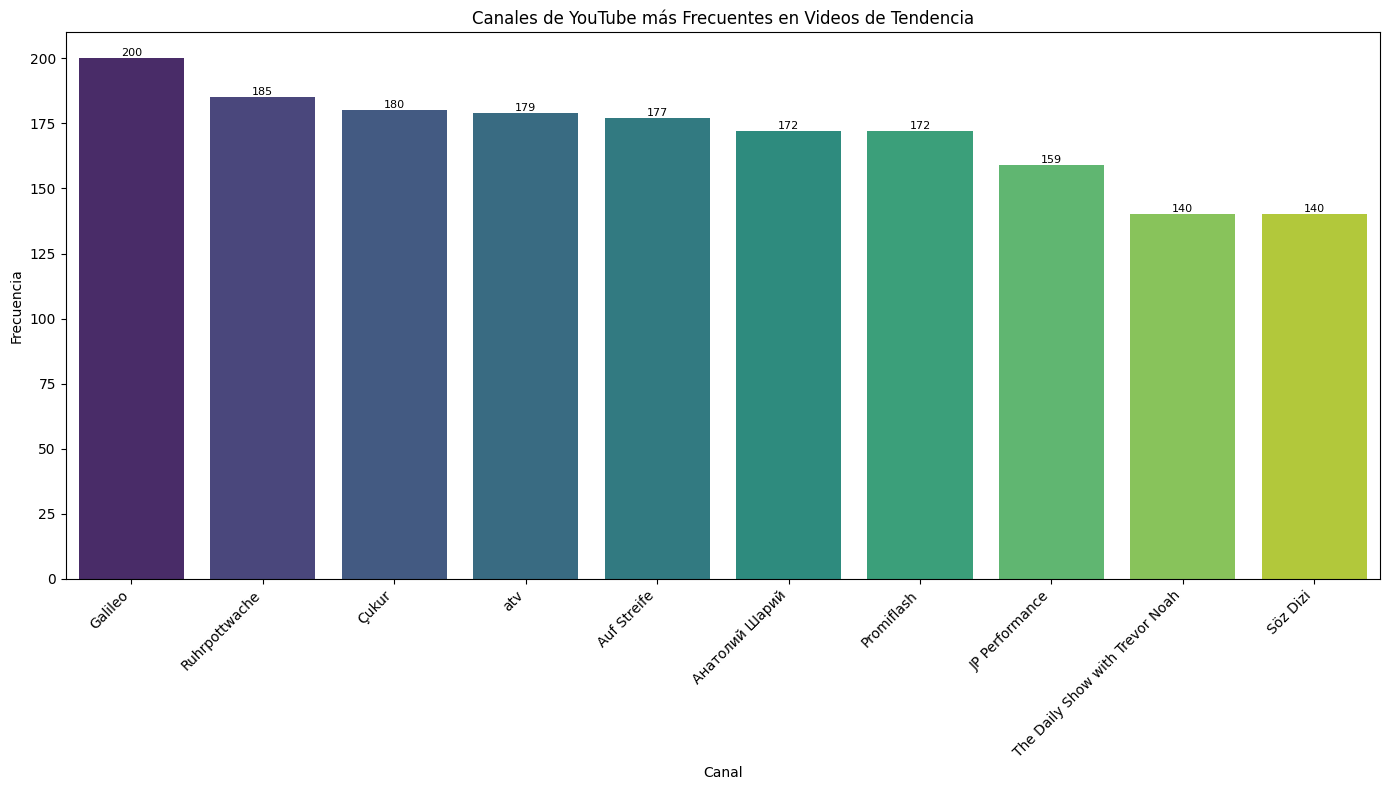

In [25]:
canales_frecuencia = df['channel_title'].value_counts()
canales_frecuencia = canales_frecuencia.sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=canales_frecuencia.head(10).index, y=canales_frecuencia.head(10).values,hue=canales_frecuencia.head(10).index ,palette='viridis')
for index, value in enumerate(canales_frecuencia.head(10).values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8, color='black')
plt.title('Canales de YouTube más Frecuentes en Videos de Tendencia')
plt.xlabel('Canal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

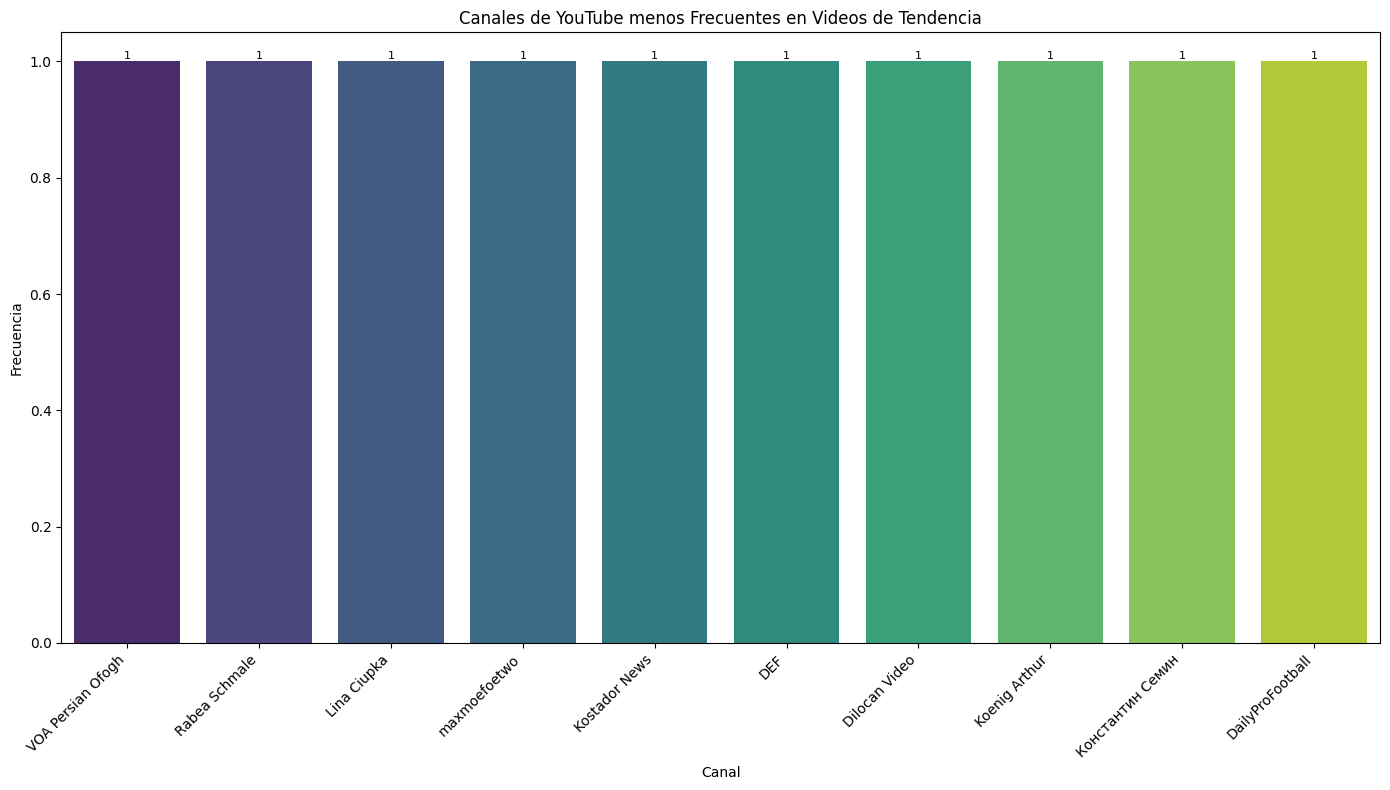

In [26]:
plt.figure(figsize=(14, 8))
sns.barplot(x=canales_frecuencia.tail(10).index, y=canales_frecuencia.tail(10).values,hue=canales_frecuencia.tail(10).index ,palette='viridis')
for index, value in enumerate(canales_frecuencia.tail(10).values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8, color='black')
plt.title('Canales de YouTube menos Frecuentes en Videos de Tendencia')
plt.xlabel('Canal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pregunta 9

In [6]:
dfTotal=df.groupby("state",as_index=False).agg(
        {
            "views":"sum",
            "likes":"sum",
            "dislikes":"sum"
        }
    )

dfTotal.head(17)
geo_df = gpd.read_file("../data/DE_states.geo.json")
merged_df = geo_df.merge(dfTotal, how='left', left_on='name', right_on='state')

C:\Users\renat\AppData\Local\Temp\ipykernel_18372\4232499869.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['name']):


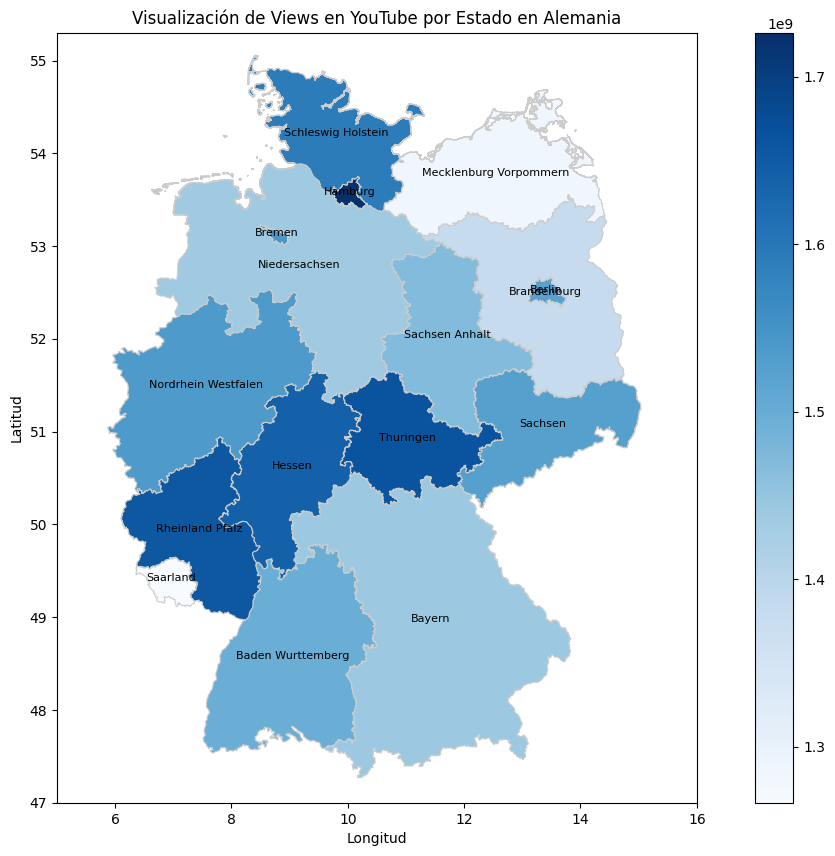

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='views', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['name']):
    ax.text(x, y, label, fontsize=8, ha='center')

ax.set_xlim(5, 16)
ax.set_ylim(47, 55.3)

ax.set_title('Visualización de Views en YouTube por Estado en Alemania')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

C:\Users\renat\AppData\Local\Temp\ipykernel_18372\247519435.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['name']):


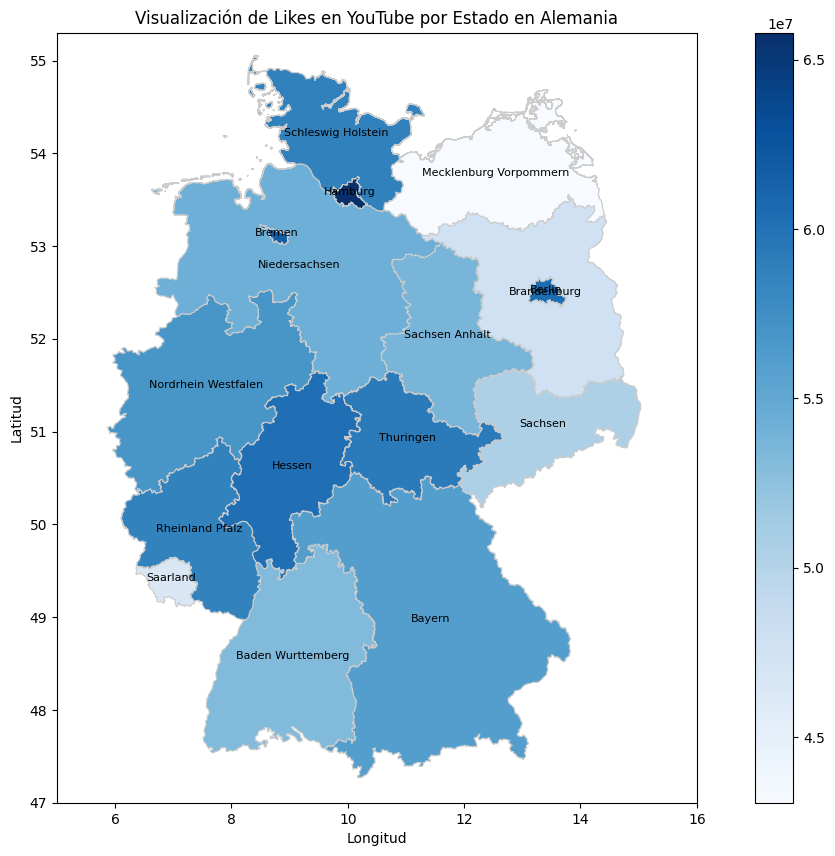

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='likes', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['name']):
    ax.text(x, y, label, fontsize=8, ha='center')

ax.set_xlim(5, 16)
ax.set_ylim(47, 55.3)

ax.set_title('Visualización de Likes en YouTube por Estado en Alemania')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()